# Data Cleaning Workflow

As **discussed** in the exercise we have **extracted** the IRC log files for the gas-phase and solvent calculations to obtain the following files. In addition we have **observed** that the energy at step zero is -955.6969739956&nbsp;*Ha* for the solvent and -955.6090406225&nbsp;*Ha* for gas-phase.

| Files    |  Description    |
|  :---------------------------    | :-------------------------  |
| stride.txt \& stride_r.txt       | The stride distance. neither file includes zero
| energy.txt \& energy_r.txt       | The energies, neither file includes energy at step zero
| C-Cl-1-3.txt \& C-Cl-1-3_r.txt   | The C-Cl bond length at all steps, including step zero in both files
| C-Cl-2-3.txt \& C-Cl-2-3_r.txt   | The other C-Cl bond length. Also includes step zero in both files

And the corresponding gas phase result files.

| Files    |  Description    |
|  :---------------------------    | :-------------------------  |
| gstride.txt \& gstride_r.txt       | The stride distance. neither file includes zero
| genergy.txt \& genergy_r.txt       | The energies, neither file includes energy at step zero
| gC-Cl-1-3.txt \& gC-Cl-1-3_r.txt   | The C-Cl bond length at all steps, including step zero in both files
| gC-Cl-2-3.txt \& gC-Cl-2-3_r.txt   | The other C-Cl bond length. Also includes step zero in both files



## Load Your Tools
Load in the modules needed for this exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Raw Data
We could have **edited** the data in a text editor, but we will do everything using the data analysis tools of *Python* and *pandas*. First we will **import** the data as a dataframe using *pandas*. The datafile must be in the same directory as this workbook, or you must specify the file path. Don't worry, *Python* will scream at you if you make a mistake and you will be able to **fix any problems**.

We will use the `pandas.read_csv()` function to **read each file** and create a dataframe object. The `header = None` setting prevents the first line from being used to label the columns. The `sep = r"\s+|_"` establishes that one or more spaces **separates** columns and also the `_` character separates columns. The `engine = "python"` means to use the python engine rather than the default *cpython* engine. The *cpython* engine is much faster, but it is not compatible with the way I am using the `sep` parameter. How do I know this? I got an error message that told me what to do.

The block of code **below** sets up the data files for importing the solvent data. This way we can change the filenames here and will not need to edit them in the document later. 

In [2]:
path = "/Users/blink/Documents/CompChem/Exercises/temp/"   # This is the folder where the data is. You will have your own different path.

stride_file = path + "stride.txt"
stride_r_file = path + "stride_r.txt"
energy_file = path + "energy.txt"
energy_r_file = path + "energy_r.txt"
C_Cl_1_3_file = path + "C-Cl-1-3.txt"
C_Cl_1_3_r_file = path + "C-Cl-1-3_r.txt"
C_Cl_2_3_file = path + "C-Cl-2-3.txt"
C_Cl_2_3_r_file = path + "C-Cl-2-3_r.txt"
TS_energy = -955.6969739956

## Cleaning the Data

Data cleaning is **half the work** in data analysis. We need to drop empty and malformed records (each line could be considered a record in this case). We will need to drop any fields (the columns in each record are the fields). that we don't need. Inspecting the dataframe shows me that I only need a single column from each file. We will also rename the column for what it represents.

In the code below I create a new dataframe by **selecting** the chosen column out of the previous dataframe. we will need to **invert** the sign on the stride_r (reaction progress) for the **reverse data**. Then we will **append** it to the stride dataframe. We will then create a dataframe for the stride value of **zero** and append it to the the top of the dataframe (this value will be the first in the dataframe.) Then I **renamed** the column header so I don't forget what it is.

In [3]:
df = pd.read_csv(stride_file, header = None, sep = r"\s+|_", engine = "python") 
df_r = pd.read_csv(stride_r_file, header = None, sep = r"\s+|_", engine = "python") 
display(df.head(3))
#display(df_r.head(3))

,0,1,2,3,4,5,6
0,AT,PATH,DISTANCE,STOTAL,=,0.09998,SQRT(AMU)-BOHR
1,AT,PATH,DISTANCE,STOTAL,=,0.19993,SQRT(AMU)-BOHR
2,AT,PATH,DISTANCE,STOTAL,=,0.29991,SQRT(AMU)-BOHR


In [4]:
stride = df[:][[5]]               # forward progress 
stride_r = df_r[:][[5]] * (-1)    # reverse the progress for reverse IRC

stride_all = pd.concat([stride,stride_r])     # combine forward and reverse data
stride_all = stride_all.rename({5:"stride"}, axis='columns')

stride_zero = pd.DataFrame({0.000}, columns = ["stride"])  # make a single-entry dataframe for zero

stride_all = pd.concat([stride_zero,stride_all])
stride_all.reset_index(drop=True, inplace=True) # reorder the index numbers
print(stride_all.head())

    stride
0  0.00000
1  0.09998
2  0.19993
3  0.29991
4  0.39990


### Rinse and Repeat

We will **repeat** this for the energy files, adding the transition state energy to the top as above.

In [5]:
df = pd.read_csv(energy_file, header = None, sep = r"\s+|_", engine = "python") 
df_r = pd.read_csv(energy_r_file, header = None, sep = r"\s+|_", engine = "python") 
display(df.head(3))
display(df_r.head(3))

,0,1,2,3,4
0,TOTAL,ENERGY,=,-955.696996,HARTREE
1,TOTAL,ENERGY,=,-955.697061,HARTREE
2,TOTAL,ENERGY,=,-955.697168,HARTREE


,0,1,2,3,4
0,TOTAL,ENERGY,=,-955.696996,HARTREE
1,TOTAL,ENERGY,=,-955.697060,HARTREE
2,TOTAL,ENERGY,=,-955.697166,HARTREE


In [6]:
energy = df[:][[3]]       # the forward energy list
energy_r = df_r[:][[3]]   # the reverse energy list

energy_all = pd.concat([energy,energy_r])
energy_all = energy_all.rename({3:"energy"}, axis='columns')

energy_zero = pd.DataFrame({TS_energy}, columns = ["energy"])

energy_all = pd.concat([energy_zero,energy_all])
energy_all.reset_index(drop=True, inplace=True)

max_energy = energy_all[:]["energy"].max()    # Find maximum energy in the list
energy_all["E(kJ/mole)"]=((energy_all - max_energy)*2625.5)   # subtract it to get relative energies

print(energy_all)

         energy  E(kJ/mole)
0   -955.696974    0.000000
1   -955.696996   -0.057247
2   -955.697061   -0.227905
3   -955.697168   -0.508833
4   -955.697314   -0.893732
..          ...         ...
96  -955.705794  -23.155871
97  -955.705798  -23.166373
98  -955.705799  -23.170049
99  -955.705800  -23.171362
100 -955.705800  -23.172149

[101 rows x 2 columns]


### More Cleaning

Again this was repeated with the C-Cl bond length files. **Here** the zero position in included so it was **removed** from the reverse dataframe before it being appended to the end of the forward dataframe. The zero data point is kept at the top of the other dataframes so this will workout. The procedure will be **repeated** again for the second set of files.

In [7]:
df = pd.read_csv(C_Cl_1_3_file, header = None, sep = r"\s+|_", engine = "python") 
df_r = pd.read_csv(C_Cl_1_3_r_file, header = None, sep = r"\s+|_", engine = "python") 
df_r=df_r.drop(index=[0], axis="index")     # drop the transition state distance from the reverse list

#display(df.head())
#display(df_r.head(3))

In [8]:
CCl1 = df[:][[5]]       # the forward C-C1 (1,3) distances
CCl1_r = df_r[:][[5]]   # the forward C-C1 (1,3) distances
CCl1_all = pd.concat([CCl1,CCl1_r])
CCl1_all = CCl1_all.rename({5:"C-Cl1"}, axis='columns')

CCl1_all.reset_index(drop=True, inplace=True)
#print(CCl1_all)

In [9]:
df = pd.read_csv(C_Cl_2_3_file, header = None, sep = r"\s+|_", engine = "python") 
df_r = pd.read_csv(C_Cl_2_3_r_file, header = None, sep = r"\s+|_", engine = "python") 
df_r=df_r.drop(index=[0], axis="index")   # drop the transition state distance from the reverse list

#display(df.head(3))
#display(df_r.head(3))

In [10]:
import numpy as np
CCl2 = df[:][[5]]
CCl2_r = df_r[:][[5]]   # reverse the progress for reverse IRC
CCl2_all = pd.concat([CCl2,CCl2_r])
CCl2_all = CCl2_all.rename({5:"C-Cl2"}, axis='columns')

CCl2_all.reset_index(drop=True, inplace=True)
#print(CCl2_all)

### Documentation is Important

Take note of the **descriptions** for how I **converted** the text data files into dataframes and then **processed** them to create the individual dataframes for each type of **data**. This **documentation** is not a waste of time. Next week, I will have no memory of what I did. I will be able to **follow** my own work and trouble shoot any errors because of this documentation. Most importantly, others will be able to recognize my genius or **correct** my mistakes

## Collate and Write Data Table

We have **various lists** of corresponding values **extracted** from the log files. Now we will **join** the Dataframes containing each list to make a **data table**.  It is important that the `pd.reset_index()` method be applied to each list so that all have the **same** series of **index values**. The `pd.join()` method will align data acording to the index value. 

In [11]:
data=stride_all.join([energy_all,CCl1_all,CCl2_all]) # Join all the lists together

data=data.sort_values(by=['stride'])        # sort the table by "stride" values
data.reset_index(drop=True, inplace=True)   # reset the index values
display(data.head())

,stride,energy,E(kJ/mole),C-Cl1,C-Cl2
0,-4.85695,-955.705800,-23.172149,1.958707,3.107504
1,-4.83761,-955.705800,-23.171362,1.958823,3.105239
2,-4.81292,-955.705799,-23.170049,1.958993,3.102160
3,-4.76930,-955.705798,-23.166373,1.959371,3.096809
4,-4.69106,-955.705794,-23.155871,1.959962,3.087264


### Writing Data Files

Now that we have a set of processed data we should **write it out** so that we can **use it again** and again without having to repeat this whole processing procedure. You will be writing two files in the end. After processing the solvent IRC data we will write the **file** "`SN2_IRC_Solvent_Data.txt`". then you will be **repeating** this whole shebang using the gas phase data extracts and, when you **return here**, we will write the file "`SN2_IRC_Data_GasPhase_Data.txt`".

In [12]:
#writefilename = "SN2_IRC_Solvent_Data.txt"
#writefilename = "SN2_IRC_Data_GasPhase_Data.txt"
writefilename = "temp.txt"   # placeholder name. Use one of the names above.

data.to_csv(path+writefilename)

## Do It All Again

**Execute** the code block below and **then go back** to the top of this notebook and execute all the data cleaning and processing code **again**. You will now have a table of the gas phase data and will save it with the indicated filename. These *Jupyter* notebooks are meant to be **used and re-used** and copied and pasted.

In [13]:
path = "/Users/blink/Documents/CompChem/Exercises/temp/"

stride_file = path + "gstride.txt"
stride_r_file = path + "gstride_r.txt"
energy_file = path + "genergy.txt"
energy_r_file = path + "genergy_r.txt"
C_Cl_1_3_file = path + "gC-Cl-1-3.txt"
C_Cl_1_3_r_file = path + "gC-Cl-1-3_r.txt"
C_Cl_2_3_file = path + "gC-Cl-2-3.txt"
C_Cl_2_3_r_file = path + "gC-Cl-2-3_r.txt"
TS_energy = -955.6090406225

## Your Ready to Plot

We now have the **two data tables saved** as text files. We will use them in the [next notebook](10_Solvent_IRC_Plots-Data.ipynb) where we will plot the data and see if there is a **difference** between the solvent and gas-phase calculations.

## Plots
Below are some **quick** plots of various value pairs. They confirm that my data processing did not cause any disasterous misalignments of data series. They were just used for **diagnostic** purposes (I found some really big mistakes that showed up as crazy zig-zag plots before I figure all this out).

I am leaving them here for your information. Please **proceed** to the next notebook to compare the data sets.

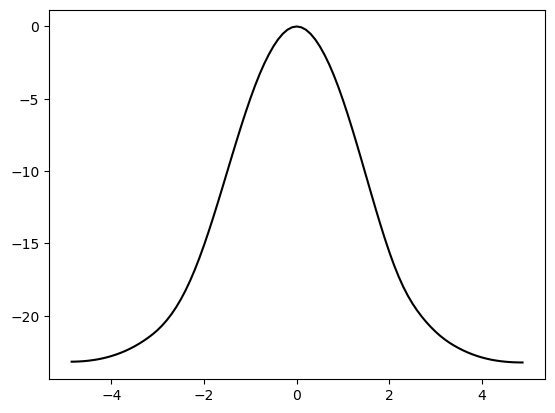

In [14]:
import matplotlib.pyplot as plt
x = data[:]["stride"]           # stride value
y = data[:]["E(kJ/mole)"]       # relative energy

plt.plot(x,y, "k-")
plt.show()

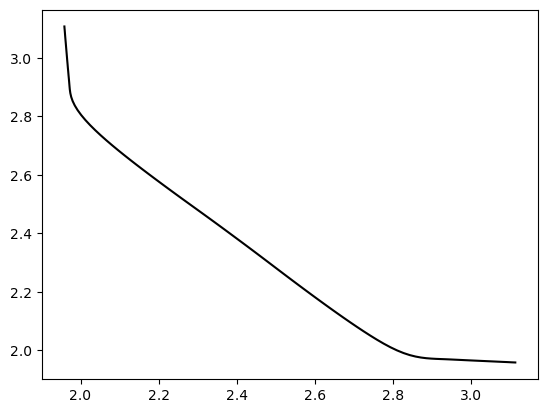

In [15]:
x = data[:]["C-Cl1"]        # 1,3 bond distance
y = data[:]["C-Cl2"]        # 2,3 bond distance

plt.plot(x,y, "k-")
plt.show()

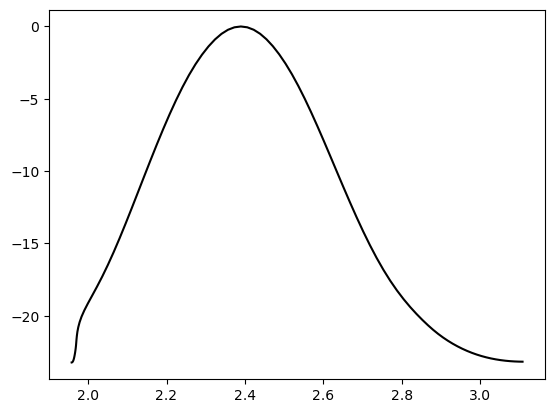

In [16]:
x = data[:]["C-Cl2"]            # 2,3 bond distance
y = data[:]["E(kJ/mole)"]       # relative energy

plt.plot(x,y, "k-")
plt.show()

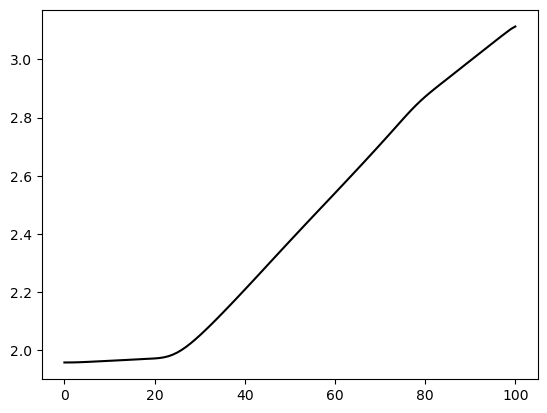

In [17]:
x = data.index             # step number
y = data[:]["C-Cl1"]       # 1,3 bond distance

plt.plot(x,y, "k-")
plt.show()